In [ ]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found ex

In [ ]:
import snowflake.connector
import pandas as pd
con = snowflake.connector.connect(
    user='xxxx',
    password='xxxx',
    account='xxxx',
    warehouse='COMPUTE_WH',
    database='CREDITCARDFRAUD',
    schema='PUBLIC'
)

In [ ]:
query='select * from "SHOP"'
df=pd.read_sql(query,con)
con.close()
print(df.head())

/tmp/ipython-input-3192860455.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,con)


   ADMINISTRATIVE  ADMINISTRATIVE_DURATION  INFORMATIONAL  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   INFORMATIONAL_DURATION  PRODUCTRELATED  PRODUCTRELATED_DURATION  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

  BOUNCERATES  EXITRATES  PAGEVALUES  SPECIALDAY MONTH  OPERATINGSYSTEMS  \
0         0.2       0.20         0.0         0.0   Feb                 1   
1           0       0.10         0.0         0.0   Feb      

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADMINISTRATIVE           12330 non-null  int64  
 1   ADMINISTRATIVE_DURATION  12330 non-null  float64
 2   INFORMATIONAL            12330 non-null  int64  
 3   INFORMATIONAL_DURATION   12330 non-null  float64
 4   PRODUCTRELATED           12330 non-null  int64  
 5   PRODUCTRELATED_DURATION  12330 non-null  float64
 6   BOUNCERATES              12330 non-null  object 
 7   EXITRATES                12330 non-null  float64
 8   PAGEVALUES               12330 non-null  float64
 9   SPECIALDAY               12330 non-null  float64
 10  MONTH                    12330 non-null  object 
 11  OPERATINGSYSTEMS         12330 non-null  int64  
 12  BROWSER                  12330 non-null  int64  
 13  REGION                   12330 non-null  int64  
 14  TRAFFICTYPE           

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADMINISTRATIVE,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
ADMINISTRATIVE_DURATION,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
INFORMATIONAL,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
INFORMATIONAL_DURATION,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
PRODUCTRELATED,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
PRODUCTRELATED_DURATION,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
EXITRATES,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PAGEVALUES,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SPECIALDAY,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000
OPERATINGSYSTEMS,12330.0,2.124006,0.911325,1.0,2.000000,2.000000,3.000000,8.000000


In [ ]:
df['BOUNCERATES'] = df['BOUNCERATES'].astype(float)


In [ ]:
df['WEEKEND'] = df['WEEKEND'].astype(int)
df['REVENUE'] = df['REVENUE'].astype(int)
df = pd.get_dummies(df, columns=['MONTH','VISITORTYPE'], drop_first=True)


In [ ]:
X = df.drop('REVENUE', axis=1)
y = df['REVENUE']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.8811841038118411
ROC-AUC: 0.8872725125865484
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.74      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



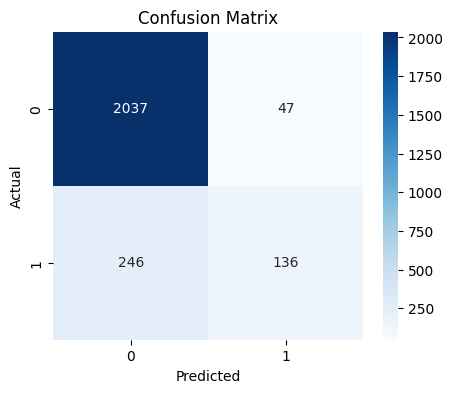

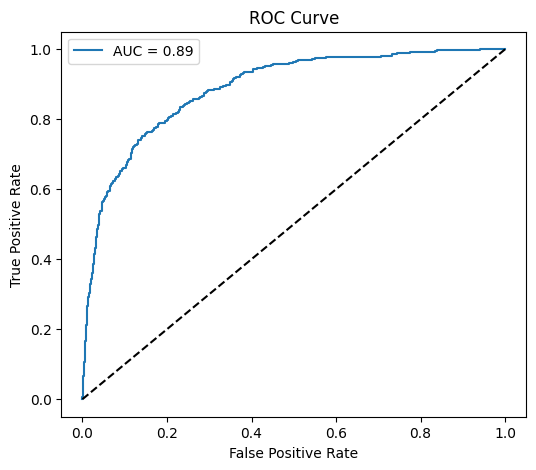

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC-AUC
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


                          Feature  Coefficient
8                      PAGEVALUES     1.536608
21                      MONTH_Nov     0.178667
4                  PRODUCTRELATED     0.093474
5         PRODUCTRELATED_DURATION     0.079986
11                        BROWSER     0.064547
14                        WEEKEND     0.058456
2                   INFORMATIONAL     0.053617
13                    TRAFFICTYPE     0.028951
1         ADMINISTRATIVE_DURATION     0.011985
23                      MONTH_Sep     0.006564
0                  ADMINISTRATIVE     0.003944
3          INFORMATIONAL_DURATION    -0.001978
22                      MONTH_Oct    -0.008102
17                      MONTH_Jul    -0.020336
12                         REGION    -0.027295
24              VISITORTYPE_Other    -0.044508
18                     MONTH_June    -0.044837
9                      SPECIALDAY    -0.052694
10               OPERATINGSYSTEMS    -0.075820
25  VISITORTYPE_Returning_Visitor    -0.084065
15           

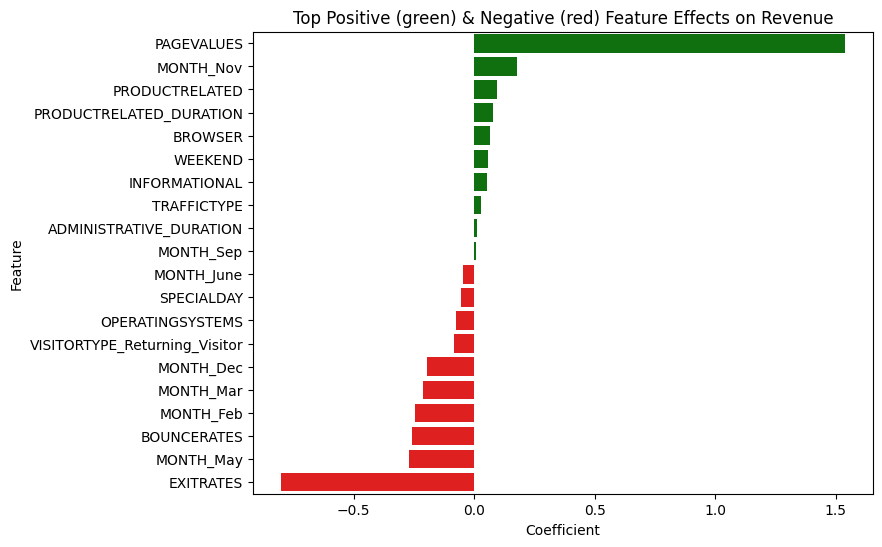

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(10), color='green')
sns.barplot(x='Coefficient', y='Feature', data=coefficients.tail(10), color='red')
plt.title("Top Positive (green) & Negative (red) Feature Effects on Revenue")
plt.show()


In [ ]:
import numpy as np
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)
print("Accuracy with threshold 0.3:", accuracy_score(y_test, y_pred_new))


Accuracy with threshold 0.3: 0.8896999188969992
